# Assignment 2

#### Student Name : Lokeshwar Srinivasan
#### Student ID : S3830774

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import tree

In [2]:
#Loading data
miceData = pd.read_excel("Data_Cortex_Nuclear.xls")
miceData

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
5,309_6,0.447506,0.628176,0.367388,2.385939,4.807635,0.218578,0.176233,2.141282,0.195188,...,0.109446,0.439833,0.116657,0.140766,0.142180,1.816389,Control,Memantine,C/S,c-CS-m
6,309_7,0.428033,0.573696,0.342709,2.334224,4.473130,0.225173,0.184004,2.012414,0.195789,...,0.111483,0.406293,0.137229,0.156682,0.157499,1.528484,Control,Memantine,C/S,c-CS-m
7,309_8,0.416923,0.564036,0.327703,2.260135,4.268735,0.214834,0.179668,2.007985,0.189803,...,0.113080,0.382532,0.123376,0.155612,0.159409,1.652658,Control,Memantine,C/S,c-CS-m
8,309_9,0.386311,0.538428,0.317720,2.125725,4.063950,0.207222,0.167778,1.861514,0.180684,...,0.105490,0.435687,0.125173,0.152711,0.158235,1.834599,Control,Memantine,C/S,c-CS-m
9,309_10,0.380827,0.499294,0.362462,2.096266,3.598587,0.227649,0.188093,1.717861,0.188093,...,0.116906,0.414793,0.146133,0.188849,0.192334,1.516862,Control,Memantine,C/S,c-CS-m


In [3]:
#Get shape of the dataset
print(miceData.shape)

(1080, 82)


In [4]:
#Get data types of the columns
miceData.dtypes

MouseID             object
DYRK1A_N           float64
ITSN1_N            float64
BDNF_N             float64
NR1_N              float64
NR2A_N             float64
pAKT_N             float64
pBRAF_N            float64
pCAMKII_N          float64
pCREB_N            float64
pELK_N             float64
pERK_N             float64
pJNK_N             float64
PKCA_N             float64
pMEK_N             float64
pNR1_N             float64
pNR2A_N            float64
pNR2B_N            float64
pPKCAB_N           float64
pRSK_N             float64
AKT_N              float64
BRAF_N             float64
CAMKII_N           float64
CREB_N             float64
ELK_N              float64
ERK_N              float64
GSK3B_N            float64
JNK_N              float64
MEK_N              float64
TRKA_N             float64
                    ...   
RRP1_N             float64
BAX_N              float64
ARC_N              float64
ERBB4_N            float64
nNOS_N             float64
Tau_N              float64
G

In [5]:
miceData.isnull().sum()

MouseID              0
DYRK1A_N             3
ITSN1_N              3
BDNF_N               3
NR1_N                3
NR2A_N               3
pAKT_N               3
pBRAF_N              3
pCAMKII_N            3
pCREB_N              3
pELK_N               3
pERK_N               3
pJNK_N               3
PKCA_N               3
pMEK_N               3
pNR1_N               3
pNR2A_N              3
pNR2B_N              3
pPKCAB_N             3
pRSK_N               3
AKT_N                3
BRAF_N               3
CAMKII_N             3
CREB_N               3
ELK_N               18
ERK_N                3
GSK3B_N              3
JNK_N                3
MEK_N                7
TRKA_N               3
                  ... 
RRP1_N               0
BAX_N                0
ARC_N                0
ERBB4_N              0
nNOS_N               0
Tau_N                0
GFAP_N               0
GluR3_N              0
GluR4_N              0
IL1B_N               0
P3525_N              0
pCASP9_N             0
PSD95_N    

In [6]:
#Replacing missing values with mean values of its same class
null_columns = miceData.columns[miceData.isnull().any()].tolist()
for col in null_columns:
    miceData[col] = miceData.groupby("class")[col].transform(lambda x: x.fillna(x.mean()))

In [7]:
miceData.isnull().sum()

MouseID            0
DYRK1A_N           0
ITSN1_N            0
BDNF_N             0
NR1_N              0
NR2A_N             0
pAKT_N             0
pBRAF_N            0
pCAMKII_N          0
pCREB_N            0
pELK_N             0
pERK_N             0
pJNK_N             0
PKCA_N             0
pMEK_N             0
pNR1_N             0
pNR2A_N            0
pNR2B_N            0
pPKCAB_N           0
pRSK_N             0
AKT_N              0
BRAF_N             0
CAMKII_N           0
CREB_N             0
ELK_N              0
ERK_N              0
GSK3B_N            0
JNK_N              0
MEK_N              0
TRKA_N             0
                  ..
RRP1_N             0
BAX_N              0
ARC_N              0
ERBB4_N            0
nNOS_N             0
Tau_N              0
GFAP_N             0
GluR3_N            0
GluR4_N            0
IL1B_N             0
P3525_N            0
pCASP9_N           0
PSD95_N            0
SNCA_N             0
Ubiquitin_N        0
pGSK3B_Tyr216_N    0
SHH_N        

#### Descriptive Statistics

In [8]:
miceData.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,...,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,0.425565,0.616913,0.319106,2.297134,3.843159,0.233206,0.181856,3.538885,0.212614,1.428060,...,0.226676,0.157435,0.136007,0.121521,0.130720,0.446073,0.171248,0.183557,0.204872,1.337784
std,0.249058,0.251316,0.049316,0.346819,0.931918,0.041583,0.027005,1.293806,0.032551,0.466403,...,0.028989,0.026746,0.024205,0.014276,0.023077,0.066432,0.056298,0.037454,0.050062,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288163,0.473669,0.287650,2.059152,3.160287,0.205821,0.164619,2.479861,0.190828,1.204546,...,0.206395,0.141045,0.119986,0.110839,0.114373,0.398082,0.133969,0.158174,0.172007,1.081423
50%,0.366125,0.565494,0.316703,2.295648,3.738908,0.231246,0.182472,3.329624,0.210681,1.355423,...,0.224000,0.153697,0.133082,0.121626,0.126249,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487574,0.697500,0.348039,2.528035,4.425107,0.257225,0.197226,4.480652,0.234558,1.560931,...,0.241655,0.169294,0.149191,0.131955,0.142427,0.490773,0.201008,0.203197,0.230680,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


#### Description column graphs

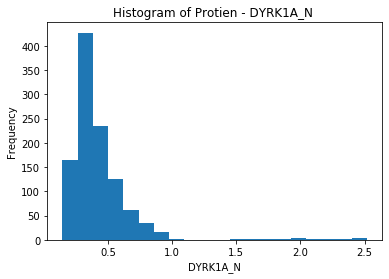

In [9]:
#histogram
miceData['DYRK1A_N'].plot(kind='hist',bins=20)
plt.title('Histogram of Protien - DYRK1A_N ')
plt.xlabel('DYRK1A_N')
plt.show()


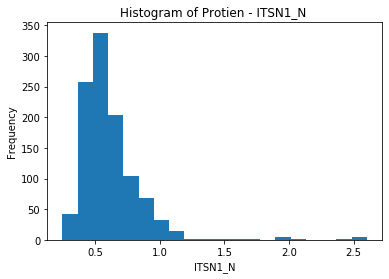

In [10]:
#histogram
miceData['ITSN1_N'].plot(kind='hist',bins=20)
plt.title('Histogram of Protien - ITSN1_N ')
plt.xlabel('ITSN1_N')
plt.show()


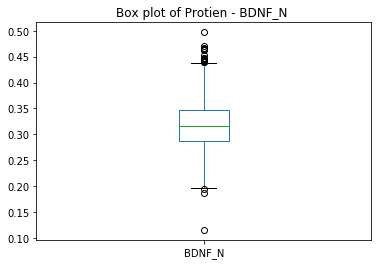

In [11]:
#Boxplot
miceData['BDNF_N'].plot(kind='box')
plt.title('Box plot of Protien - BDNF_N ')
plt.show()


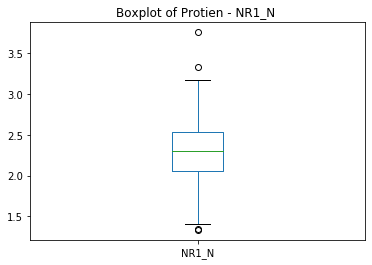

In [12]:
#Boxplot
miceData['NR1_N'].plot(kind='box')
plt.title('Boxplot of Protien - NR1_N ')
plt.show()

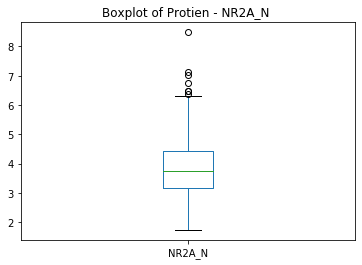

In [13]:
#Boxplot
miceData['NR2A_N'].plot(kind='box')
plt.title('Boxplot of Protien - NR2A_N ')
plt.show()

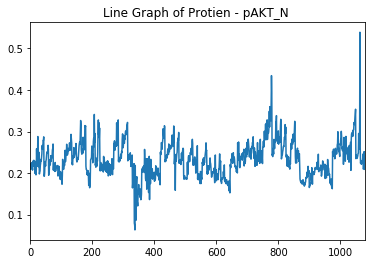

In [14]:
#Line graph
miceData['pAKT_N'].plot(kind='line')
plt.title('Line Graph of Protien - pAKT_N ')
plt.show()

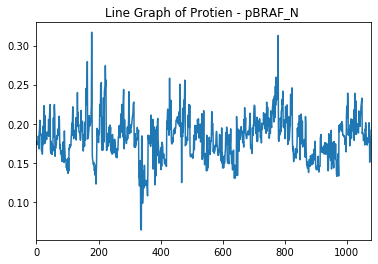

In [15]:
#Line graph
miceData['pBRAF_N'].plot(kind='line')
plt.title('Line Graph of Protien - pBRAF_N ')
plt.show()

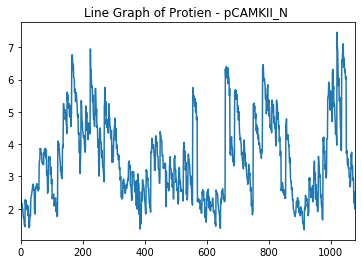

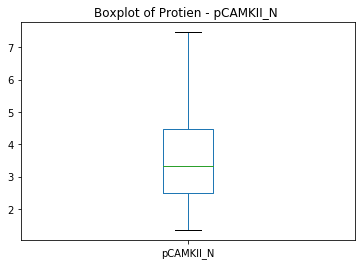

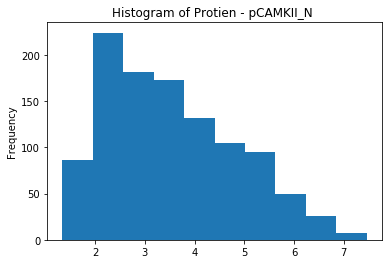

In [16]:
#line graph
miceData['pCAMKII_N'].plot(kind='line')
plt.title('Line Graph of Protien - pCAMKII_N ')
plt.show()
#boxplot
miceData['pCAMKII_N'].plot(kind='box')
plt.title('Boxplot of Protien - pCAMKII_N ')
plt.show()
#histogram
miceData['pCAMKII_N'].plot(kind='hist')
plt.title('Histogram of Protien - pCAMKII_N ')
plt.show()


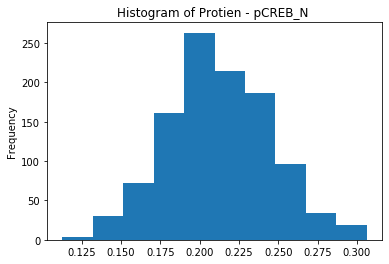

In [17]:
#histogram
miceData['pCREB_N'].plot(kind='hist')
plt.title('Histogram of Protien - pCREB_N ')
plt.show()

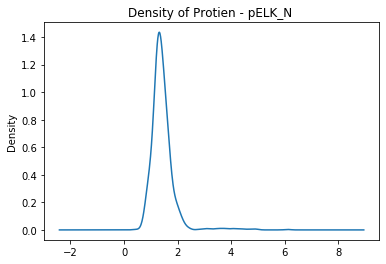

In [18]:
#Density graph
miceData['pELK_N'].plot(kind='density')
plt.title('Density of Protien - pELK_N ')
plt.show()

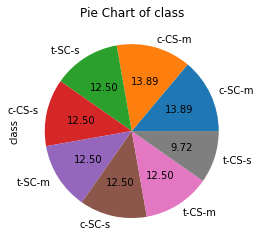

In [19]:
#Pie chart
miceData['class'].value_counts().plot(kind='pie',autopct='%.2f')  
plt.title("Pie Chart of class")
plt.show()

#### Relationship between pair of attributes

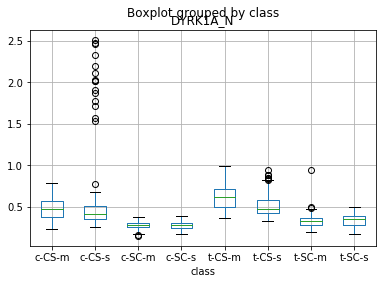

In [20]:
#boxplot by groups
miceData.boxplot(column = "DYRK1A_N",by = "class")

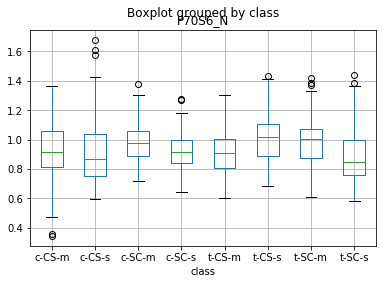

In [21]:
#boxplot by groups
miceData.boxplot(column = "P70S6_N",by = "class")

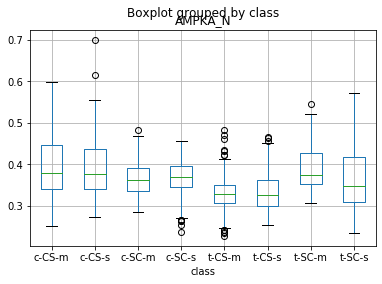

In [22]:
#boxplot by groups
miceData.boxplot(column = "AMPKA_N",by = "class")

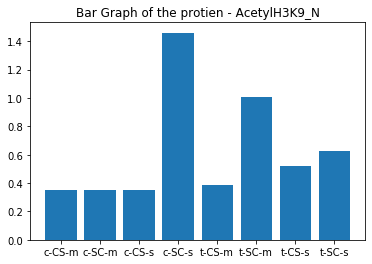

In [23]:
#Bar graph
plt.bar(miceData['class'],miceData['AcetylH3K9_N'])
plt.title("Bar Graph of the protien - AcetylH3K9_N")
plt.show()

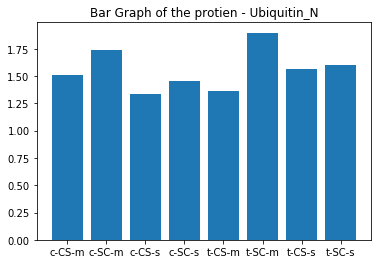

In [24]:
#Bar graph
plt.bar(miceData['class'],miceData['Ubiquitin_N'])
plt.title("Bar Graph of the protien - Ubiquitin_N")
plt.show()

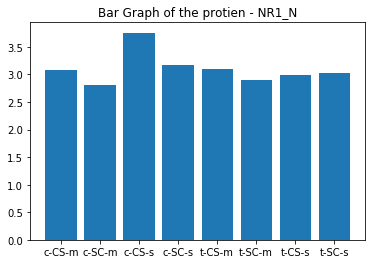

In [25]:
#Bar graph
plt.bar(miceData['class'],miceData['NR1_N'])
plt.title("Bar Graph of the protien - NR1_N")
plt.show()

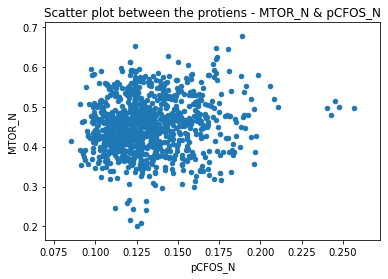

In [26]:
#Scatter plot
miceData.plot(kind = 'scatter',x = 72, y = 34)
plt.title("Scatter plot between the protiens - MTOR_N & pCFOS_N")
plt.show()

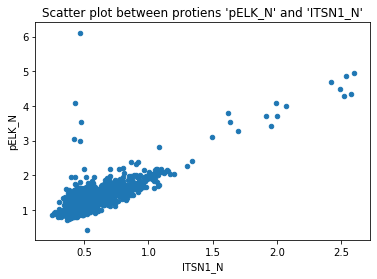

In [27]:
#scatter plot
miceData.plot(kind = 'scatter',x = 2, y = 10)
plt.title("Scatter plot between protiens 'pELK_N' and 'ITSN1_N'")
plt.show()

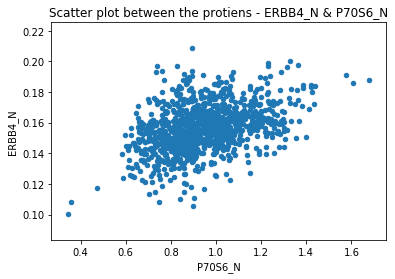

In [28]:
#Scatter plot
miceData.plot(kind = 'scatter',x = 45, y = 55)
plt.title("Scatter plot between the protiens - ERBB4_N & P70S6_N")
plt.show()

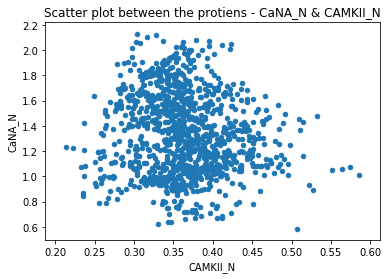

In [29]:
#scatter plot
miceData.plot(kind = 'scatter',x = 22, y = 77)
plt.title("Scatter plot between the protiens - CaNA_N & CAMKII_N")
plt.show()

#### Splitting data into Training and Testing data

In [30]:
#Assigning feature variables and target variable
X = miceData.loc[:, 'DYRK1A_N':'CaNA_N']
Y = miceData['class']

In [31]:
#Splitting data into training data and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [32]:
print("Shape of X_train :",X_train.shape)
print("Shape of X_test :",X_test.shape)
print("Shape of Y_train :",Y_train.shape)
print("Shape of Y_test :",Y_test.shape)

Shape of X_train : (864, 77)
Shape of X_test : (216, 77)
Shape of Y_train : (864,)
Shape of Y_test : (216,)


#### Model 1 : K-Nearest Neighbour Classifier

In [33]:
### K-Nearest Neighbour Classifier
knn = KNeighborsClassifier(n_neighbors = 5,weights = 'distance',p=1)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='distance')

In [34]:
predictedK = knn.predict(X_test)
predictedK

array(['t-SC-m', 'c-SC-s', 't-CS-s', 't-CS-m', 't-SC-m', 't-CS-m',
       't-SC-s', 't-SC-m', 't-SC-m', 'c-SC-m', 'c-CS-m', 't-SC-m',
       't-CS-m', 'c-CS-s', 't-SC-s', 'c-CS-s', 't-SC-s', 't-CS-s',
       'c-CS-s', 't-SC-s', 'c-SC-s', 'c-SC-m', 't-SC-m', 'c-CS-m',
       't-SC-m', 'c-CS-s', 'c-SC-m', 't-CS-m', 'c-CS-m', 'c-SC-s',
       'c-CS-s', 't-SC-s', 'c-CS-m', 't-SC-m', 't-SC-m', 't-SC-m',
       'c-SC-m', 't-SC-s', 't-CS-s', 't-SC-m', 'c-CS-m', 't-SC-m',
       'c-CS-m', 't-CS-m', 'c-CS-m', 'c-SC-s', 'c-CS-s', 't-CS-s',
       't-SC-s', 'c-SC-s', 't-CS-m', 'c-SC-m', 'c-SC-m', 'c-SC-m',
       'c-CS-m', 'c-CS-m', 't-SC-s', 'c-CS-s', 't-CS-m', 'c-SC-m',
       'c-CS-s', 't-CS-m', 'c-SC-s', 't-CS-m', 'c-CS-s', 't-CS-s',
       't-SC-s', 't-SC-m', 'c-CS-s', 'c-CS-s', 'c-CS-s', 't-CS-s',
       'c-SC-s', 't-CS-s', 'c-SC-s', 't-CS-m', 'c-CS-m', 't-CS-m',
       'c-CS-m', 't-SC-m', 'c-CS-s', 't-SC-s', 'c-CS-m', 't-SC-m',
       't-CS-m', 'c-CS-m', 'c-SC-s', 'c-SC-s', 't-CS-m', 't-SC

In [35]:
cmK = confusion_matrix(Y_test,predictedK)
print(cmK)

[[34  0  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  0  0]
 [ 0  0 24  0  0  0  0  0]
 [ 0  0  0 22  0  0  0  0]
 [ 0  0  0  0 28  1  0  0]
 [ 0  0  0  0  0 22  0  0]
 [ 0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0 23]]


In [36]:
crK = classification_report(Y_test,predictedK)
print(crK)

              precision    recall  f1-score   support

      c-CS-m       1.00      1.00      1.00        34
      c-CS-s       1.00      1.00      1.00        29
      c-SC-m       1.00      1.00      1.00        24
      c-SC-s       1.00      1.00      1.00        22
      t-CS-m       1.00      0.97      0.98        29
      t-CS-s       0.96      1.00      0.98        22
      t-SC-m       1.00      1.00      1.00        33
      t-SC-s       1.00      1.00      1.00        23

    accuracy                           1.00       216
   macro avg       0.99      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



In [37]:
print(knn.score(X_test,Y_test))

0.9953703703703703


#### Model 2 : Decision Tree Model

In [38]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [39]:
predictedD = dtc.predict(X_test)
predictedD

array(['t-SC-m', 'c-SC-s', 't-CS-s', 't-CS-m', 't-SC-m', 't-CS-m',
       't-SC-s', 't-SC-m', 't-SC-m', 'c-SC-m', 'c-CS-m', 't-SC-m',
       't-CS-m', 'c-CS-s', 'c-SC-m', 'c-CS-s', 't-SC-s', 't-CS-s',
       'c-CS-s', 't-SC-s', 'c-SC-s', 't-SC-m', 't-SC-m', 'c-CS-m',
       't-SC-m', 'c-CS-s', 'c-SC-m', 'c-CS-s', 'c-CS-m', 'c-SC-s',
       'c-CS-s', 'c-SC-m', 'c-CS-m', 't-SC-m', 'c-SC-s', 't-SC-m',
       'c-SC-m', 't-SC-s', 't-CS-s', 't-SC-m', 'c-CS-m', 't-SC-m',
       'c-CS-s', 'c-CS-m', 'c-CS-m', 'c-SC-s', 'c-CS-s', 't-CS-s',
       't-SC-s', 'c-SC-s', 't-CS-s', 'c-SC-m', 'c-SC-m', 'c-SC-m',
       'c-CS-s', 'c-CS-m', 't-SC-s', 'c-CS-s', 't-CS-m', 'c-SC-m',
       'c-CS-s', 't-CS-m', 'c-SC-s', 't-CS-m', 'c-CS-s', 'c-CS-s',
       't-SC-s', 't-SC-m', 'c-CS-s', 'c-CS-s', 'c-CS-s', 't-CS-m',
       'c-SC-s', 't-CS-s', 'c-SC-s', 't-CS-m', 'c-CS-m', 'c-CS-s',
       'c-CS-m', 't-SC-m', 'c-CS-s', 't-SC-s', 'c-CS-m', 't-SC-m',
       'c-CS-s', 'c-CS-m', 'c-SC-s', 'c-SC-m', 't-CS-m', 't-SC

In [40]:
cmD = confusion_matrix(Y_test,predictedD)
print(cmD)

[[24  5  1  0  4  0  0  0]
 [ 1 27  0  0  1  0  0  0]
 [ 0  0 21  2  0  0  1  0]
 [ 0  0  1 20  0  0  1  0]
 [ 1  5  0  0 20  3  0  0]
 [ 0  4  0  0  2 16  0  0]
 [ 0  0  2  2  0  0 29  0]
 [ 0  0  2  0  0  0  0 21]]


In [41]:
crD = classification_report(Y_test,predictedD)
print(crD)

              precision    recall  f1-score   support

      c-CS-m       0.92      0.71      0.80        34
      c-CS-s       0.66      0.93      0.77        29
      c-SC-m       0.78      0.88      0.82        24
      c-SC-s       0.83      0.91      0.87        22
      t-CS-m       0.74      0.69      0.71        29
      t-CS-s       0.84      0.73      0.78        22
      t-SC-m       0.94      0.88      0.91        33
      t-SC-s       1.00      0.91      0.95        23

    accuracy                           0.82       216
   macro avg       0.84      0.83      0.83       216
weighted avg       0.84      0.82      0.83       216



In [42]:
print(dtc.score(X_test,Y_test))

0.8240740740740741


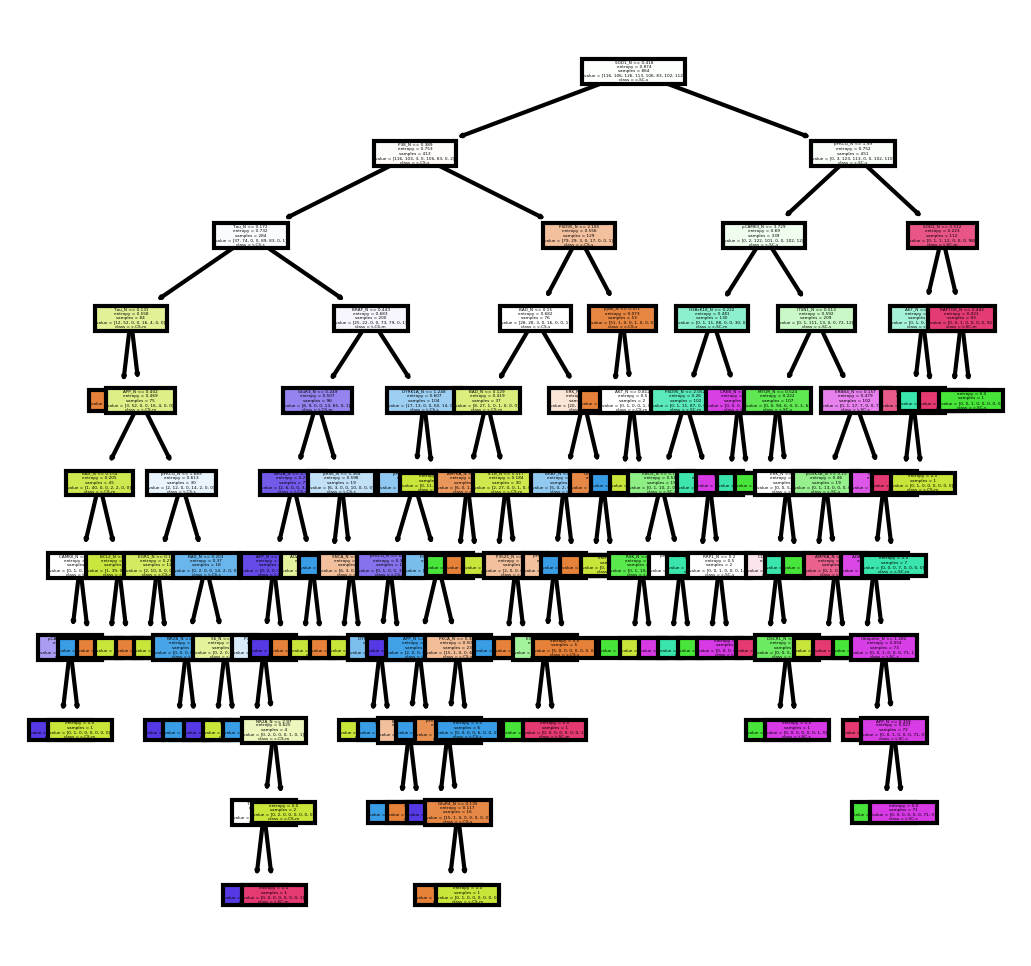

In [43]:
fn=['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N',
       'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N']
cn=['c-CS-s', 'c-CS-m', 'c-SC-s','c-SC-m','t-CS-s','t-CS-m','t-SC-s','t-SC-m']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(dtc,  feature_names = fn,class_names=cn,filled = True);

fig.savefig('dt.png')

In [44]:
#Saving the image as dot file
with open('miceDT.dot', 'w') as f:
    f = tree.export_graphviz(dtc, out_file= f, feature_names=fn, class_names=cn, filled=True, rounded=True, special_characters=True)
